In [5]:
from fasta import *

In [11]:
import umap

In [17]:
import matplotlib.pyplot as plt

In [6]:
df = load_data()

In [7]:
df

,length,ratio_g,ratio_t,ratio_c,ratio_a,number_exons,chromosom,start_pos,end_pos,length_from_pos
0,1991,20.592667,30.688096,22.752386,25.966851,3,chr1,84267198,84326229,59031
1,966,22.256729,26.086957,24.534161,27.122153,4,chr16,74226290,74249420,23130
2,1646,22.053463,23.815310,23.815310,30.315917,12,chrX,129611042,129658231,47189
3,368,30.978261,16.847826,27.717391,24.456522,2,chr17,48634534,48636771,2237
4,3522,32.822260,15.247019,31.317433,20.613288,6,chr1,2481358,2488450,7092
...,...,...,...,...,...,...,...,...,...,...
9996,400,18.000000,28.000000,22.500000,31.500000,2,chr20,18040136,18051652,11516
9997,3452,21.176130,25.811124,21.176130,31.836616,3,chr3,106959574,107004434,44860
9998,482,24.896266,27.800830,24.896266,22.406639,3,chr2,3579573,3581372,1799
9999,401,29.426434,18.453865,32.169576,19.950125,2,chr12,131649526,131687467,37941


In [8]:
features = ['length', 'ratio_g', 'ratio_a', 'ratio_c', 'ratio_t', 'number_exons', 'length_from_pos']

In [9]:
df[features]

,length,ratio_g,ratio_a,ratio_c,ratio_t,number_exons,length_from_pos
0,1991,20.592667,25.966851,22.752386,30.688096,3,59031
1,966,22.256729,27.122153,24.534161,26.086957,4,23130
2,1646,22.053463,30.315917,23.815310,23.815310,12,47189
3,368,30.978261,24.456522,27.717391,16.847826,2,2237
4,3522,32.822260,20.613288,31.317433,15.247019,6,7092
...,...,...,...,...,...,...,...
9996,400,18.000000,31.500000,22.500000,28.000000,2,11516
9997,3452,21.176130,31.836616,21.176130,25.811124,3,44860
9998,482,24.896266,22.406639,24.896266,27.800830,3,1799
9999,401,29.426434,19.950125,32.169576,18.453865,2,37941


In [14]:
np_array = df[features].to_numpy()

In [15]:
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(np_array)

In [16]:
reducer.shape

(10001, 2)

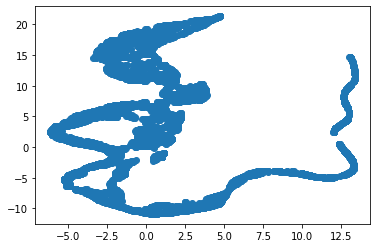

In [20]:
plt.scatter(reducer[:, 0], reducer[:, 1])
plt.savefig("reduction1.pdf")

<ipython-input-19-e4755b2f97bb>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("reduction1.pdf", density=300)


<Figure size 432x288 with 0 Axes>

In [21]:
model, centroids = fit_kmeans(reducer, 7)

In [28]:
def run_kmeans_custom(df, model, centroids):
    output_path = './output/kmeans' 

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='b', zorder=10)
    plt.scatter(df[:, 0], df[:, 1], c=model.predict(df))
    #plt.xlabel(feature1)
    #plt.ylabel(feature2)
    #plt.savefig('%s/%s-%s.png' % (output_path, feature1, feature2))
    #plt.clf()
    #plt.close()

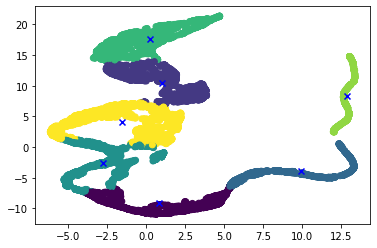

In [30]:
run_kmeans_custom(reducer, model, centroids)